# Classification
## Linear Regression with Stochastic Gradient Descent
Goal: classify handwritten digits 0-9 using linear regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

First we grab our data set and load it in. It contains 70,000 images similar to the ones below:
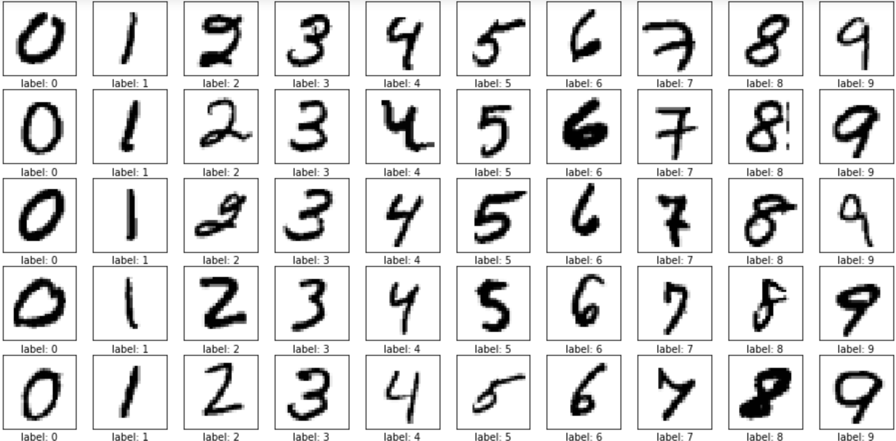

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist['DESCR']

'mldata.org dataset: mnist-original'

Next we need to assign our input variable to the matrices representing digits and our target variable to the vector containing the labels. Using labeled data is called **supervised learning**. The most basic formulation of our linear regression alrogithm is below:


Essentially we want to learn the **weights** from the data. This is done by using a **cost function**:
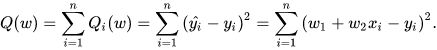

If we minimize the cost function for weight, then we can find the optimal weight.
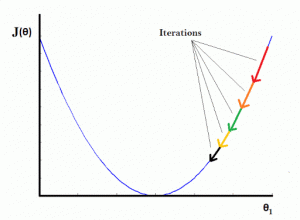

We can use **stochastic gradient descent** to minize the cost function:
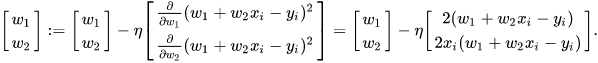

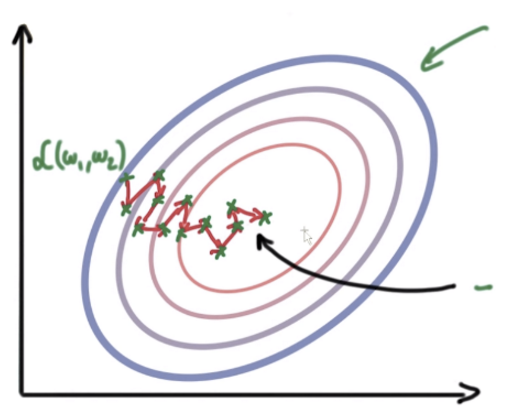

Now let's put this all together!

In [ ]:
X = mnist['data']
y = mnist['target']

In [5]:
X.shape # 70,000 rows with 784 (28X28) columns. Columns are our features.

(70000, 784)

In [6]:
y.shape # A single column vector of the labels

(70000,)

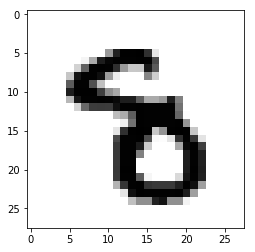

In [7]:
random_digit = X[50000]
random_digit_reshaped = random_digit.reshape(28, 28)
plt.imshow(random_digit_reshaped, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [8]:
y[50000]

8.0

We need to split our training and test data up. 80/20 is a good rule of thumb. Then we shuffle the data which improves learning performance by reducing bias.

In [9]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [10]:
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

Alpha is our most important **hyperparameter**. It adjusts the learning rate for the gradient descent algorithm.

In [11]:
alphas = np.array([0.1,0.01,0.001,0.0001])

`scikit-learn` offers model selection to find the optimal alpha.

In [12]:
sgd_classifier = SGDClassifier()
grid = GridSearchCV(estimator=sgd_classifier, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.1   ,  0.01  ,  0.001 ,  0.0001])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
grid.predict([random_digit])

array([ 8.])

Cross validation is an efficient measure of accuracy:
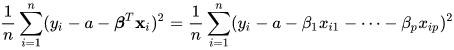

In [14]:
cross_val_score(grid, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87242551,  0.86854343,  0.87288093])

Cofusion matrices are awesome!

In [15]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5630,    2,   29,   12,    8,  156,   42,    7,   22,   15],
       [   1, 6521,   34,   27,   12,   43,   11,   16,   70,    7],
       [ 118,   70, 4800,  276,  104,   83,  120,  121,  228,   38],
       [  59,   50,  217, 4563,   16,  869,   57,   97,  105,   98],
       [  24,   30,   46,   33, 5138,   52,   57,   16,  125,  321],
       [ 161,   28,   41,  372,   76, 4160,  140,   24,  264,  155],
       [  70,   28,   45,    6,   75,  132, 5507,    7,   42,    6],
       [  44,   36,   79,   57,   91,   35,    3, 5544,   33,  343],
       [  85,  178,  113,  267,  158,  930,   45,   63, 3838,  174],
       [  50,   36,   15,   78,  440,  173,    1,  280,   39, 4837]])

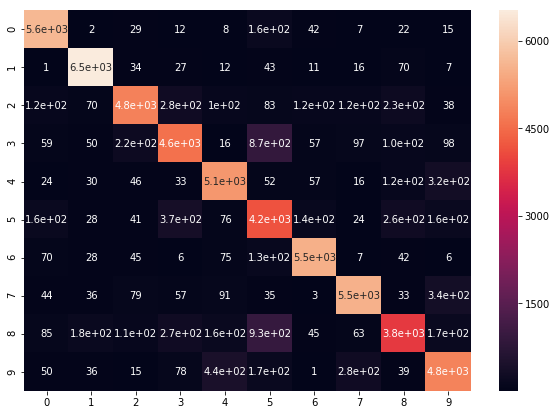

In [16]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in range(0, 10)],
                  columns = [i for i in range(0, 10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Convolutional Neural Network

Same basic concepts, but super charged with deep learning!
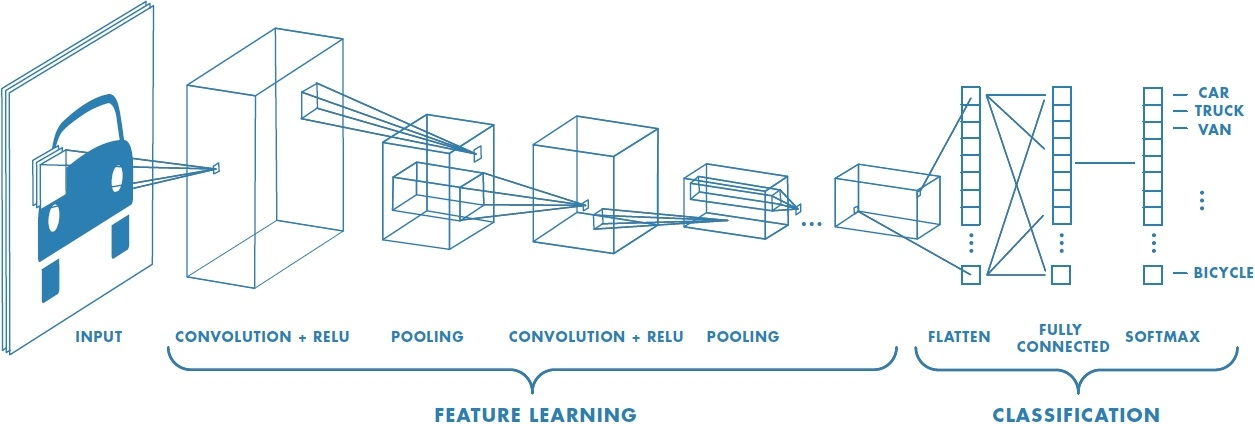

Softmax for classification:

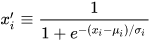

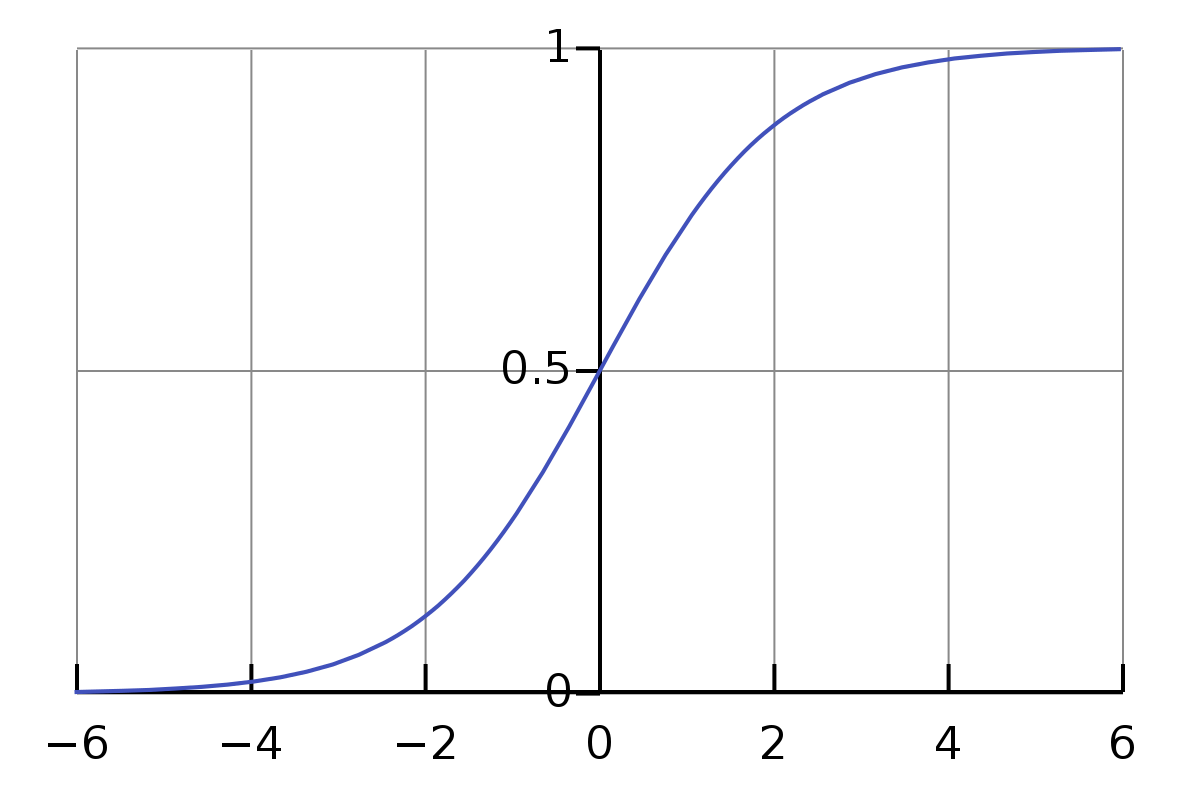

http://setosa.io/ev/image-kernels/

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from tensorflow.python.client import device_lib
from keras import optimizers
device_lib.list_local_devices()

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.9.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [28]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [29]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [30]:
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Generate more training sets:

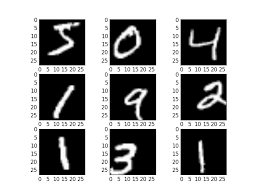

In [31]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [32]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [35]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=20, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0229 - val_acc: 0.9932
Epoch 2/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0524 - acc: 0.9840 - val_loss: 0.0240 - val_acc: 0.9922
Epoch 3/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0491 - acc: 0.9849 - val_loss: 0.0240 - val_acc: 0.9922
Epoch 4/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0488 - acc: 0.9854 - val_loss: 0.0232 - val_acc: 0.9924
Epoch 5/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0456 - acc: 0.9868 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 6/20
937/937 [==============================] - 16s 18ms/step - loss: 0.0430 - acc: 0.9872 - val_loss: 0.0283 - val_acc: 0.9917
Epoch 7/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0207 - val_acc: 0.9934
Epoch 8/20
937/937 [==============================] - 17s 18ms

In [36]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 109us/step

Test accuracy:  0.9942
